#The objective of the analysis 📈 and therefore of the model 🧠 is to predict the availability of water 💧 in the aquifers in Italy 🇮🇹. In this specific notebook 📓, we will focus on the availability of resources in the Auser aquifer.

🌊 Aquifer_Auser: Information about the Auser aquifer. This water body consists of two subsystems, that we call NORH and SOUTH, where the former partly influences the behavior of the latter.

The levels of the NORTH sector are represented by the values of the:

💧 SAL (Depth_to_Groundwater_SAL)
💧 PAG (Depth_to_Groundwater_PAG)
💧 CoS (Depth_to_Groundwater_COS)
💧 DIEC (Depth_to_Groundwater_DIEC) wells,

while the levels of the SOUTH sector by the:

💧 LT2 (Depth_to_Groundwater_LT2) well.

💾Import libraries

In [1]:
#  Import some data manipulation and plotting packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

👨‍💻 0. Data Ingestion

In [2]:
import pandas as pd
file = "/workspace/Time-Series-Acea-Smart-Water-Analytics-/data/raw/Aquifer_Auser.csv"
total_data = pd.read_csv(file)

🎲 1. Descriptive data analysis

In [3]:
total_data.head()
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            5295 no

In [4]:
#Missing values
total_data.isnull().sum()*100/len(total_data)

Date                                        0.000000
Rainfall_Gallicano                         35.062546
Rainfall_Pontetetto                        35.062546
Rainfall_Monte_Serra                       35.136130
Rainfall_Orentano                          35.062546
Rainfall_Borgo_a_Mozzano                   35.062546
Rainfall_Piaggione                         39.538877
Rainfall_Calavorno                         35.062546
Rainfall_Croce_Arcana                      35.062546
Rainfall_Tereglio_Coreglia_Antelminelli    35.062546
Rainfall_Fabbriche_di_Vallico              35.062546
Depth_to_Groundwater_LT2                   41.108658
Depth_to_Groundwater_SAL                   44.260486
Depth_to_Groundwater_PAG                   53.311258
Depth_to_Groundwater_CoS                   47.081187
Depth_to_Groundwater_DIEC                  59.896983
Temperature_Orentano                        0.000000
Temperature_Monte_Serra                     0.000000
Temperature_Ponte_a_Moriano                 0.

In [5]:
#Nan values
total_data.isnull().sum()

Date                                          0
Rainfall_Gallicano                         2859
Rainfall_Pontetetto                        2859
Rainfall_Monte_Serra                       2865
Rainfall_Orentano                          2859
Rainfall_Borgo_a_Mozzano                   2859
Rainfall_Piaggione                         3224
Rainfall_Calavorno                         2859
Rainfall_Croce_Arcana                      2859
Rainfall_Tereglio_Coreglia_Antelminelli    2859
Rainfall_Fabbriche_di_Vallico              2859
Depth_to_Groundwater_LT2                   3352
Depth_to_Groundwater_SAL                   3609
Depth_to_Groundwater_PAG                   4347
Depth_to_Groundwater_CoS                   3839
Depth_to_Groundwater_DIEC                  4884
Temperature_Orentano                          0
Temperature_Monte_Serra                       0
Temperature_Ponte_a_Moriano                   0
Temperature_Lucca_Orto_Botanico               0
Volume_POL                              

🎲 Combinatorics of variables

In [6]:
# Original column names
column_names = total_data.columns

# Create a new "Rainfall" column that contains the sum of precipitation columns
rainfall_columns = ['Rainfall_Gallicano', 'Rainfall_Pontetetto', 'Rainfall_Monte_Serra',
                    'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano', 'Rainfall_Piaggione',
                    'Rainfall_Calavorno', 'Rainfall_Croce_Arcana', 'Rainfall_Tereglio_Coreglia_Antelminelli',
                    'Rainfall_Fabbriche_di_Vallico']
total_data['Rainfall'] = total_data[rainfall_columns].sum(axis=1)

# Create a new "Depth_to_Groundwater" column that contains the sum of water depth columns
depth_columns = ['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
                 'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC']
total_data['Depth_to_Groundwater'] = total_data[depth_columns].sum(axis=1)

# Create a new "Temperature" column that contains the sum of temperature columns
temperature_columns = ['Temperature_Orentano', 'Temperature_Monte_Serra', 'Temperature_Ponte_a_Moriano',
                       'Temperature_Lucca_Orto_Botanico']
total_data['Temperature'] = total_data[temperature_columns].sum(axis=1)

# Create a new "Volume" column that contains the sum of volume columns
volume_columns = ['Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL']
total_data['Volume'] = total_data[volume_columns].sum(axis=1)

# Create a new "Hydrometry" column that contains the sum of hydrometry columns
hydrometry_columns = ['Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione']
total_data['Hydrometry'] = total_data[hydrometry_columns].sum(axis=1)

# Drop the original precipitation, water depth, temperature, volume, and hydrometry columns
columns_to_drop = (rainfall_columns + depth_columns + temperature_columns + volume_columns + hydrometry_columns)
total_data.drop(columns=columns_to_drop, inplace=True)

# Show the first rows of the DataFrame with consolidated columns
total_data.head()



,Date,Rainfall,Depth_to_Groundwater,Temperature,Volume,Hydrometry
0,05/03/1998,0.0,0.0,0.00,0.0,0.0
1,06/03/1998,0.0,0.0,10.05,0.0,0.0
2,07/03/1998,0.0,0.0,19.20,0.0,0.0
3,08/03/1998,0.0,0.0,25.25,0.0,0.0
4,09/03/1998,0.0,0.0,24.25,0.0,0.0


Date parsing

In [7]:
total_data['Date'] = pd.to_datetime(total_data['Date'], format='%d/%m/%Y') # Now the 'date' column is parsed correctly as datetime objects

In [8]:
total_data.isnull().sum()
total_data.isnull().sum()*100/len(total_data)

Date                    0.0
Rainfall                0.0
Depth_to_Groundwater    0.0
Temperature             0.0
Volume                  0.0
Hydrometry              0.0
dtype: float64

1.📊 Data visualization

⛲Depth_to_Groundwater 👉 Target

⛲Rainfall 👉 It indicates the quantity of rain falling, expressed in millimeters (mm), in the area

⛲Temperature 👉 It indicates the temperature, expressed in °C, detected by the thermometric station

⛲Volume 👉  It indicates the volume of water, expressed in cubic meters (mc), taken from the drinking water treatment plant

⛲Hydrometry 👉 It indicates the groundwater level, expressed in meters (m), detected by the hydrometric station

In [9]:
# Display all data from the 'Temperature' column in the 'total_data' DataFrame
print(total_data['Temperature'])

0        0.00
1       10.05
2       19.20
3       25.25
4       24.25
        ...  
8149    67.70
8150    69.25
8151    70.30
8152    64.90
8153    68.90
Name: Temperature, Length: 8154, dtype: float64


🏖 Change from fahrenheit to celsius

In [10]:
total_data['Temperature'] = total_data['Temperature'].apply(lambda fahrenheit: (fahrenheit - 32) * 5/9)

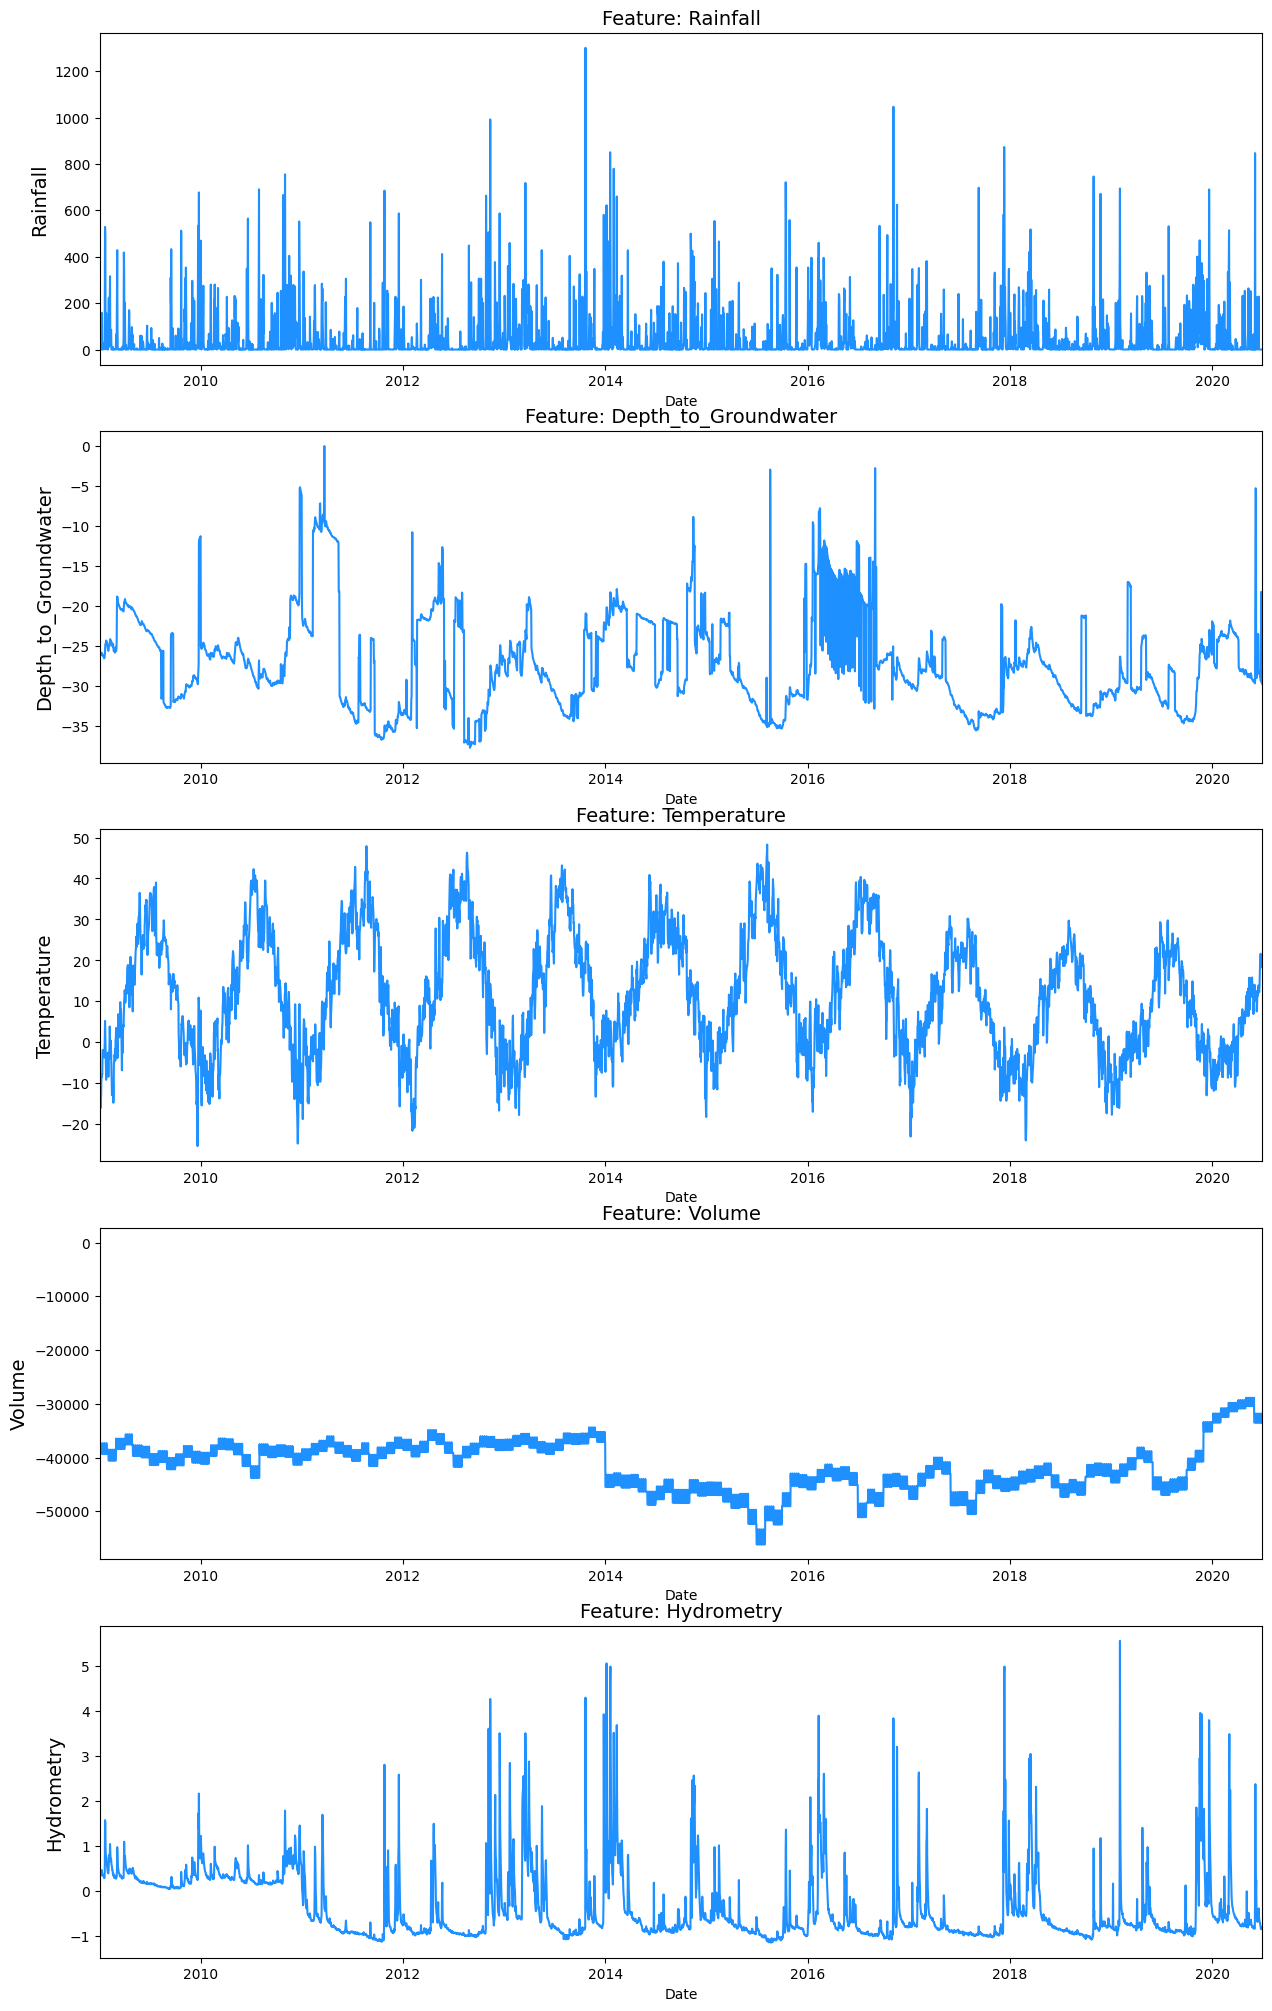

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

# Subplots
f, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 25))

# Iterate through the columns of total_data
for i, column in enumerate(total_data.drop('Date', axis=1).columns):
    sns.lineplot(x=total_data['Date'], y=total_data[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    ax[i].set_xlim([date(2009, 1, 1), date(2020, 6, 30)])

# Show graphics
plt.show()

🖥 2.Data preprocessing

In [12]:
total_data = total_data.sort_values(by='Date')
# Check time intervals
total_data['delta'] = total_data['Date'] - total_data['Date'].shift(1)
total_data[['Date', 'delta']].head()

,Date,delta
0,1998-03-05,NaT
1,1998-03-06,1 days
2,1998-03-07,1 days
3,1998-03-08,1 days
4,1998-03-09,1 days


In [13]:
total_data['delta'].sum(), total_data['delta'].count()

(Timedelta('8153 days 00:00:00'), 8153)

In [14]:
total_data = total_data.drop('delta', axis=1)
total_data.isna().sum()

Date                    0
Rainfall                0
Depth_to_Groundwater    0
Temperature             0
Volume                  0
Hydrometry              0
dtype: int64

Not necessary, since there are no missing values

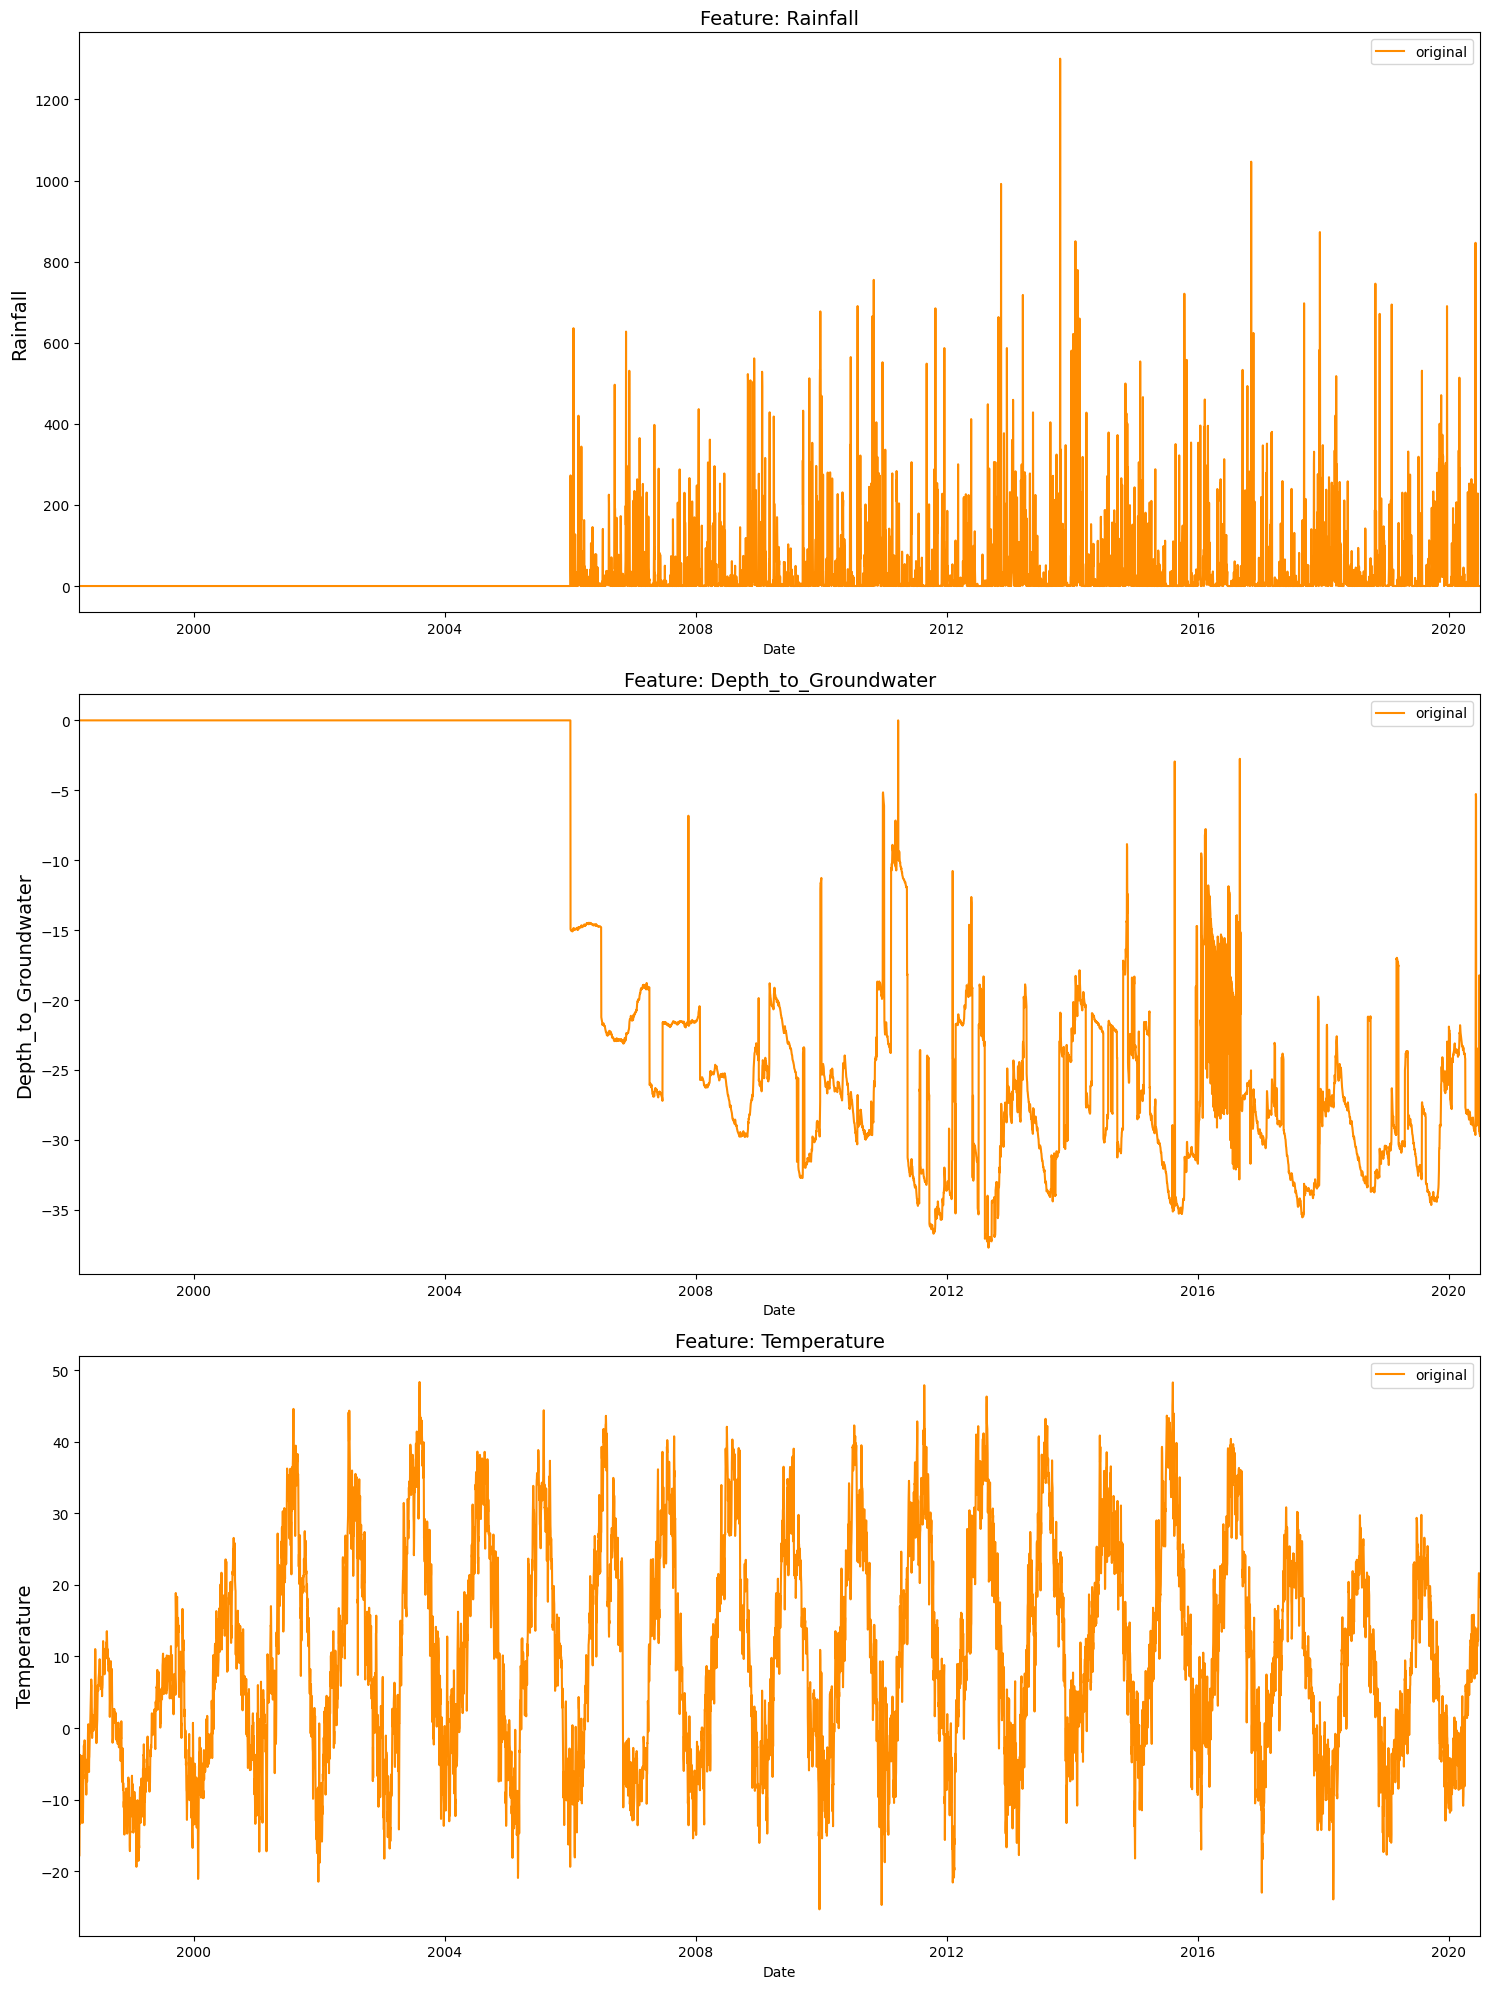

In [15]:
f, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 20))

# Plot for 'Rainfall'
sns.lineplot(x=total_data['Date'], y=total_data['Rainfall'], ax=ax[0], color='darkorange', label='original')
ax[0].set_title('Feature: Rainfall', fontsize=14)
ax[0].set_ylabel(ylabel='Rainfall', fontsize=14)

# Plot for 'Depth_to_Groundwater'
sns.lineplot(x=total_data['Date'], y=total_data['Depth_to_Groundwater'], ax=ax[1], color='darkorange', label='original')
ax[1].set_title('Feature: Depth_to_Groundwater', fontsize=14)
ax[1].set_ylabel(ylabel='Depth_to_Groundwater', fontsize=14)

# Plot for 'Temperature'
sns.lineplot(x=total_data['Date'], y=total_data['Temperature'], ax=ax[2], color='darkorange', label='original')
ax[2].set_title('Feature: Temperature', fontsize=14)
ax[2].set_ylabel(ylabel='Temperature', fontsize=14)

# Adjust date limits
for i in range(3):
    ax[i].set_xlim([total_data['Date'].min(), total_data['Date'].max()])

# Show the plots
plt.tight_layout()
plt.show()


🎞Resampling if apply

Upsampling is when the frequency of samples is increased (e.g. days to hours)

Downsampling is when the frequency of samples is decreased (e.g. days to weeks)

In [16]:
# Make sure 'Date' is the index and is in datetime format
total_data['Date'] = pd.to_datetime(total_data['Date'])
total_data.set_index('Date', inplace=True)

# Perform weekly resampling and calculate the mean of selected variables
downsample = total_data[['Depth_to_Groundwater', 'Temperature', 'Volume', 'Hydrometry', 'Rainfall']].resample('7D').mean()

# Reset the index
downsample.reset_index(drop=False, inplace=True)

# Now, downsample contains the data sampled on a weekly basis
total_data = downsample.copy()

⛪Stationary

In [17]:
#Check stationary

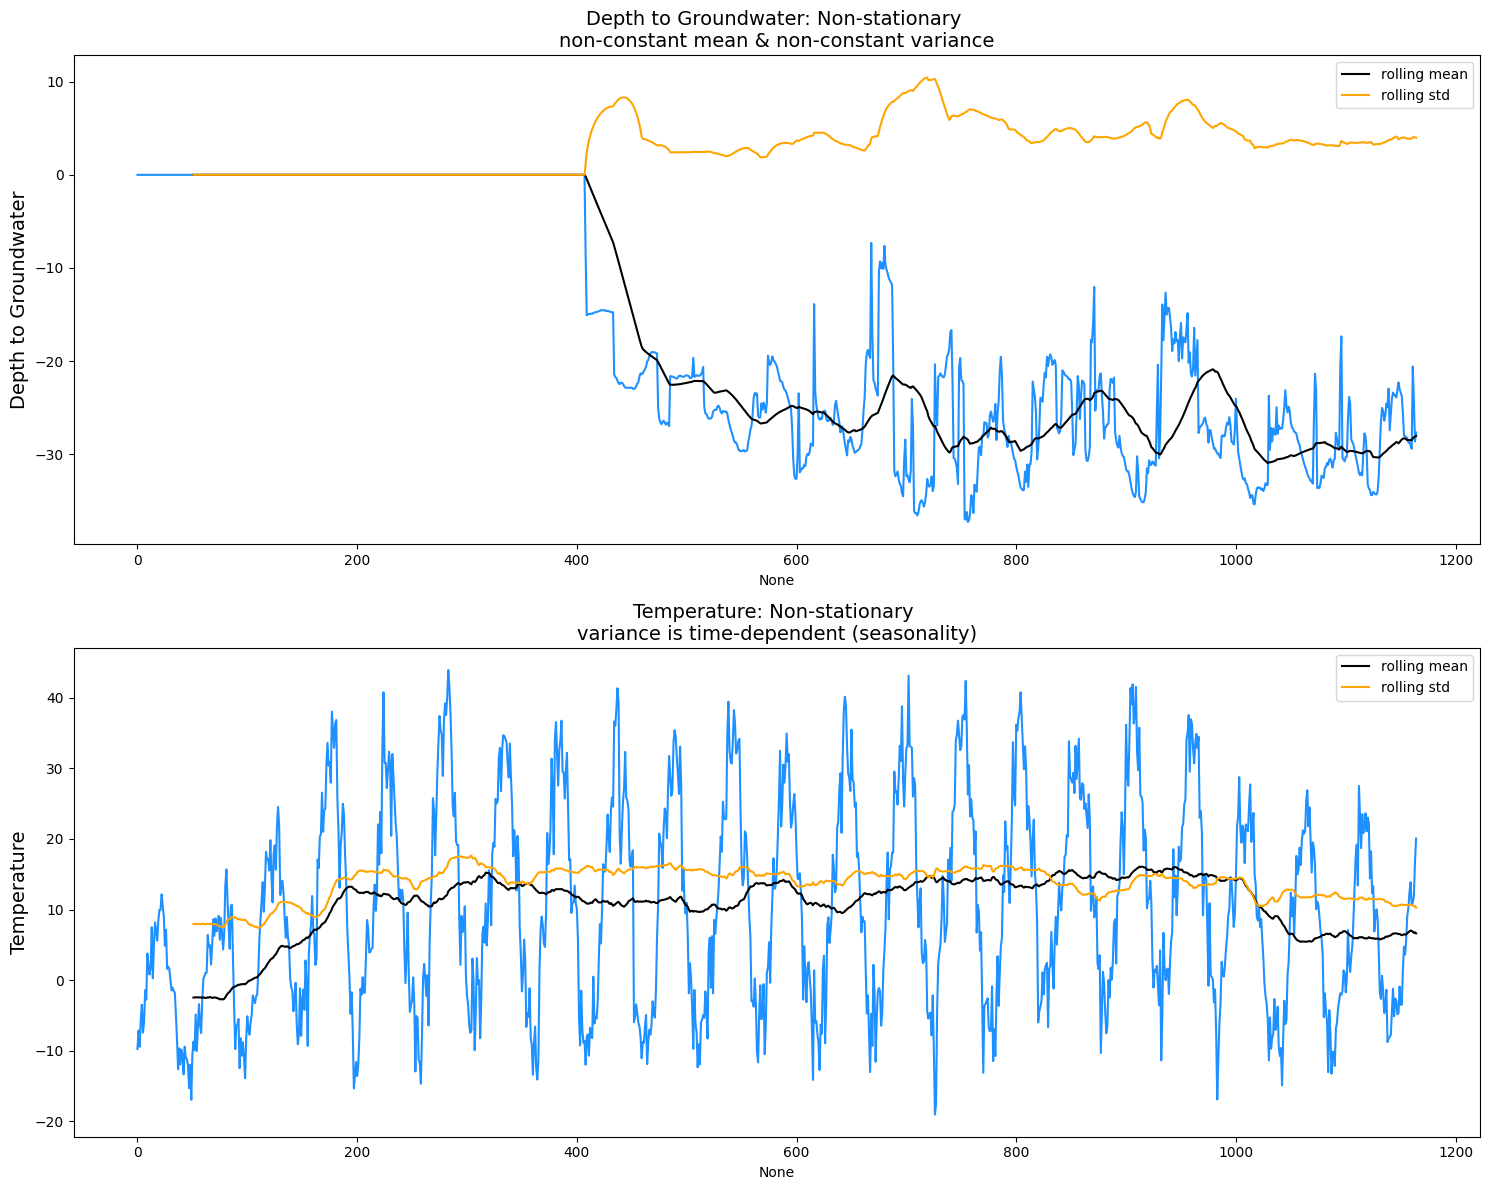

In [18]:
rolling_window = 52

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

# Plot for 'Depth_to_Groundwater'
sns.lineplot(x=total_data.index, y=total_data['Depth_to_Groundwater'], ax=ax[0], color='dodgerblue')
sns.lineplot(x=total_data.index, y=total_data['Depth_to_Groundwater'].rolling(rolling_window).mean(), ax=ax[0], color='black', label='rolling mean')
sns.lineplot(x=total_data.index, y=total_data['Depth_to_Groundwater'].rolling(rolling_window).std(), ax=ax[0], color='orange', label='rolling std')
ax[0].set_title('Depth to Groundwater: Non-stationary \nnon-constant mean & non-constant variance', fontsize=14)
ax[0].set_ylabel(ylabel='Depth to Groundwater', fontsize=14)

# Plot for 'Temperature'
sns.lineplot(x=total_data.index, y=total_data['Temperature'], ax=ax[1], color='dodgerblue')
sns.lineplot(x=total_data.index, y=total_data['Temperature'].rolling(rolling_window).mean(), ax=ax[1], color='black', label='rolling mean')
sns.lineplot(x=total_data.index, y=total_data['Temperature'].rolling(rolling_window).std(), ax=ax[1], color='orange', label='rolling std')
ax[1].set_title('Temperature: Non-stationary \nvariance is time-dependent (seasonality)', fontsize=14)
ax[1].set_ylabel(ylabel='Temperature', fontsize=14)

plt.tight_layout()
plt.show()


📈 Upper Chart - Groundwater Depth:

Displays fluctuations in groundwater depth over time, with negative values indicating measurements below a surface reference point.
The moving average (black line) shows a changing trend with no apparent seasonal pattern.
The moving standard deviation (orange line) reveals significant variability in the measurements.
The data is non-stationary, meaning that the mean and variance are not constant and may be influenced by various environmental or human factors.

📉 Lower Chart - Temperature:

Shows a clear seasonal pattern in temperatures with regular peaks and valleys.
The moving average (black line) smoothes out fluctuations and highlights the underlying trend.
The moving standard deviation (orange line) indicates temperature variability, with a possible seasonal dependency.
Temperature data is non-stationary in the sense that the mean and variance change throughout the year, following a seasonal pattern.
Conclusion:

A seasonal pattern is evident in temperature, but not in groundwater depth according to the provided visualization. 🌡️💧

Dickey Fuller Testing

In [19]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(total_data['Depth_to_Groundwater'].values)
result

(-1.9712787554892122,
 0.29930657940316713,
 7,
 1157,
 {'1%': -3.436014535478888,
  '5%': -2.8640412872730208,
  '10%': -2.56810174401953},
 4825.923034735783)

In [20]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  1165 non-null   datetime64[ns]
 1   Depth_to_Groundwater  1165 non-null   float64       
 2   Temperature           1165 non-null   float64       
 3   Volume                1165 non-null   float64       
 4   Hydrometry            1165 non-null   float64       
 5   Rainfall              1165 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 54.7 KB


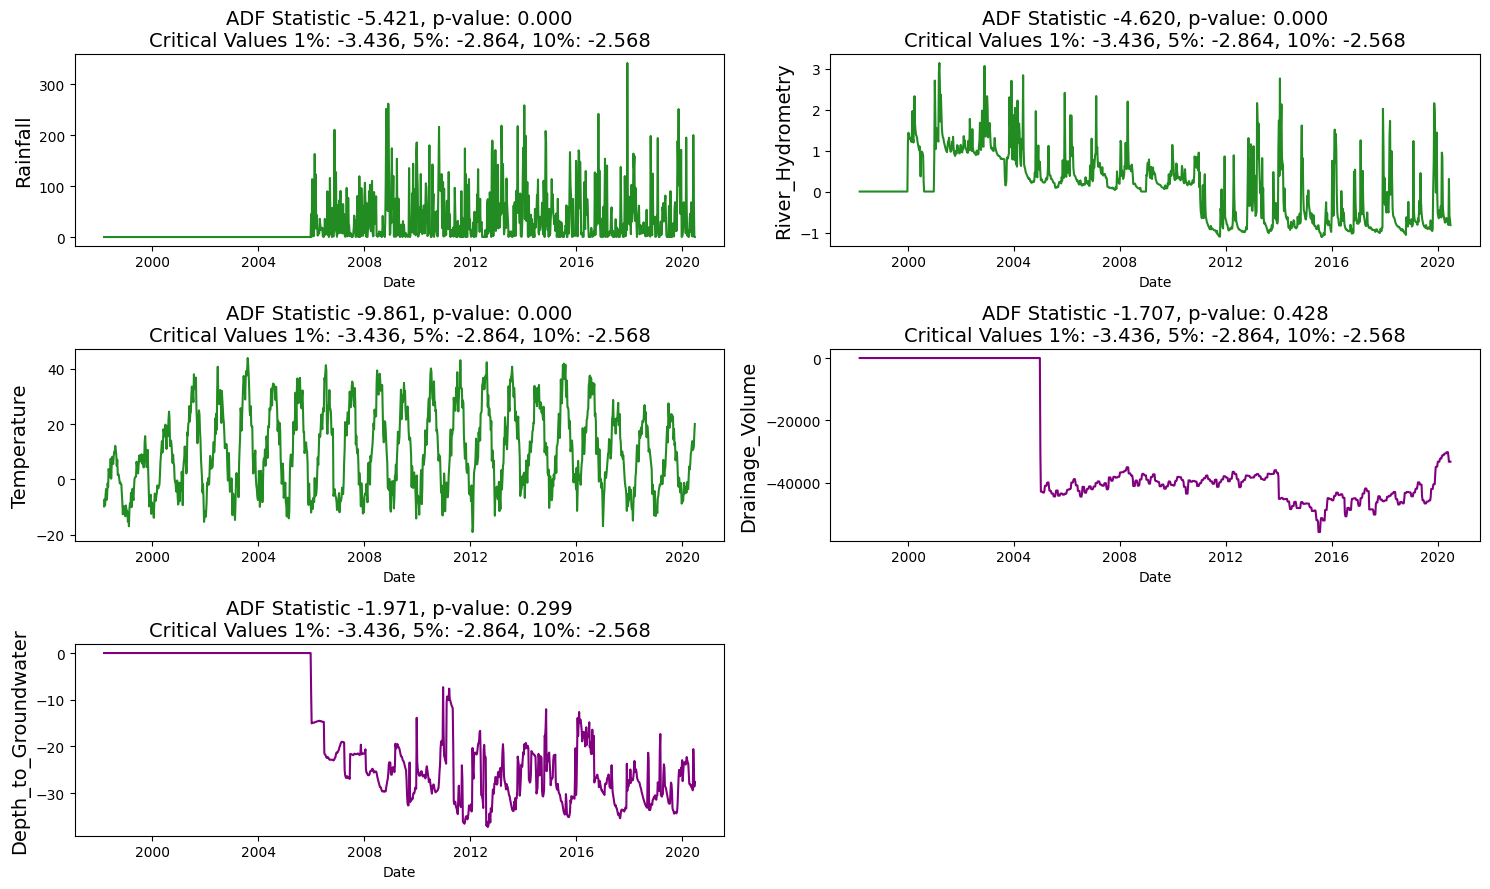

In [21]:
f, ax = plt.subplots(nrows=3, ncols=2, figsize=(15, 9))

def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen' 
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=total_data['Date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

visualize_adfuller_results(total_data['Rainfall'].values, 'Rainfall', ax[0, 0])
visualize_adfuller_results(total_data['Temperature'].values, 'Temperature', ax[1, 0])
visualize_adfuller_results(total_data['Hydrometry'].values, 'River_Hydrometry', ax[0, 1])
visualize_adfuller_results(total_data['Volume'].values, 'Drainage_Volume', ax[1, 1])
visualize_adfuller_results(total_data['Depth_to_Groundwater'].values, 'Depth_to_Groundwater', ax[2, 0])

f.delaxes(ax[2, 1])
plt.tight_layout()
plt.show()

📊 Chart Interpretation

🌧️ Rainfall (Precipitation): The ADF statistic is -5.421, and the p-value is 0.000, indicating that the time series is stationary as the p-value is less than 0.05, and the ADF statistic is smaller than the critical values.

🌡️ Temperature: The ADF statistic is -9.861, and the p-value is 0.000, similar to rainfall, indicating stationary behavior.

🌊 River Hydrometry: The ADF statistic is -4.620, and the p-value is 0.000, suggesting stationarity.

💧 Drainage Volume: The ADF statistic is -1.707, and the p-value is 0.428, implying that the time series is not stationary as the p-value is greater than 0.05, and the ADF statistic is higher than the critical values.

🕳️ Depth to Groundwater: The ADF statistic is -1.971, and the p-value is 0.299, also indicating non-stationarity for the same reasons as drainage volume.

Applying Transformation:

There are no direct indications of the need for transformations in the rainfall, temperature, and river hydrometry series, as these series already appear to be stationary. Transformations are often applied to stabilize variance, so if there were evidence of non-constant variance in the stationary data, you might consider applying a transformation.

Applying Differencing:

Drainage Volume: Since the time series is non-stationary, it is recommended to apply differencing to achieve stationarity.

Depth to Groundwater: This series is also non-stationary, so it should be differenced to make it stationary.

Therefore, the Drainage Volume and Depth to Groundwater series require differencing. For the other series, being stationary according to the ADF test, differencing may not be necessary, although the need for transformation depends on the constancy of the variance, which cannot be determined solely from the ADF test. 📉📈

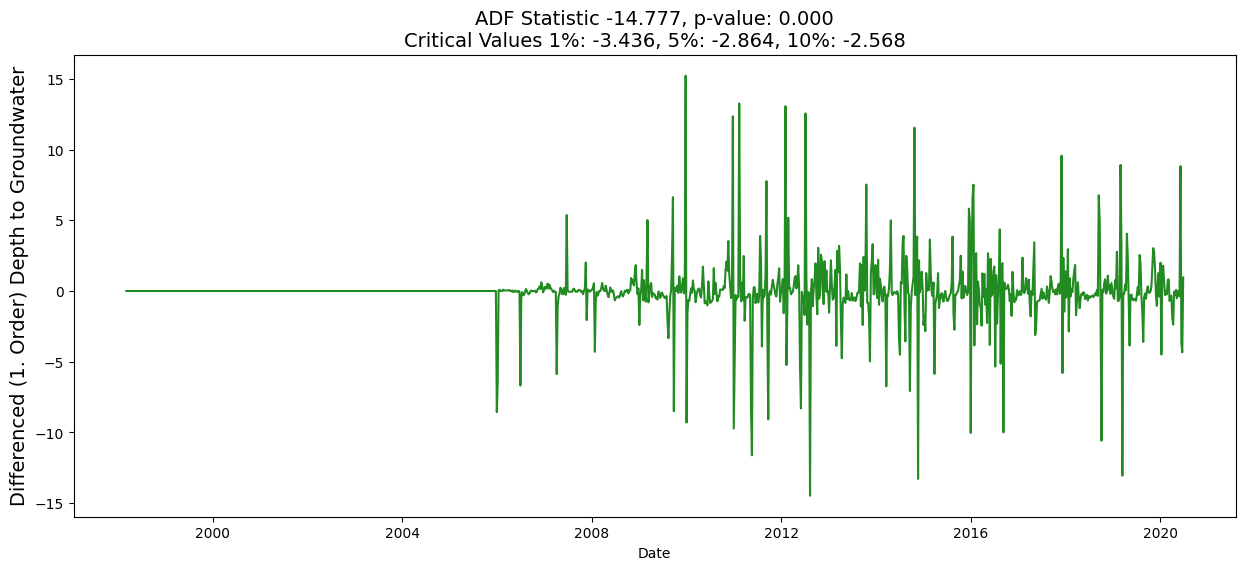

In [22]:
# First Order Differencing for 'Depth_to_Groundwater'
ts_diff_depth = np.diff(total_data['Depth_to_Groundwater'])
total_data['Depth_to_Groundwater_diff_1'] = np.append([0], ts_diff_depth)

# First Order Differencing for 'Drainage Volume'
ts_diff_drainage = np.diff(total_data['Volume'])
total_data['Drainage_Volume_diff_1'] = np.append([0], ts_diff_drainage)

# Display of 'Depth_to_Groundwater' after differentiation
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))
visualize_adfuller_results(total_data['Depth_to_Groundwater_diff_1'], 'Differenced (1. Order) Depth to Groundwater', ax)


🧙‍♂️ Feature engineering

In [23]:
# Add date features
total_data['year'] = pd.DatetimeIndex(total_data['Date']).year
total_data['month'] = pd.DatetimeIndex(total_data['Date']).month
total_data['day'] = pd.DatetimeIndex(total_data['Date']).day
total_data['day_of_year'] = pd.DatetimeIndex(total_data['Date']).dayofyear
total_data['week_of_year'] = pd.DatetimeIndex(total_data['Date']).strftime('%U').astype(int)
total_data['quarter'] = pd.DatetimeIndex(total_data['Date']).quarter
total_data['season'] = total_data['month'] % 12 // 3 + 1

# View new features
total_data[['Date', 'year', 'month', 'day', 'day_of_year', 'week_of_year', 'quarter', 'season']].head()

,Date,year,month,day,day_of_year,week_of_year,quarter,season
0,1998-03-05,1998,3,5,64,9,1,2
1,1998-03-12,1998,3,12,71,10,1,2
2,1998-03-19,1998,3,19,78,11,1,2
3,1998-03-26,1998,3,26,85,12,1,2
4,1998-04-02,1998,4,2,92,13,2,2


🎯Cyclical representation

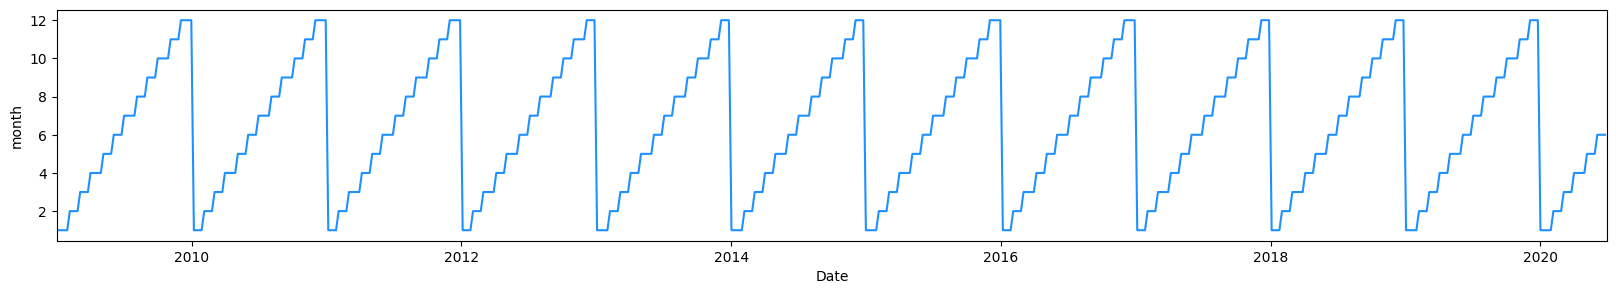

In [24]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 3))

sns.lineplot(x=total_data['Date'], y=total_data['month'], color='dodgerblue')
ax.set_xlim([date(2009, 1, 1), date(2020, 6, 30)])
plt.show()

⏰Time series: Stationary

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

core_columns =  [
    'Rainfall', 'Temperature', 'Volume', 
    'Hydrometry', 'Depth_to_Groundwater'
]

for column in core_columns:
    decomp = seasonal_decompose(total_data[column], period=52, model='additive', extrapolate_trend='freq')
    total_data[f"{column}_trend"] = decomp.trend # Trend: The increasing or decreasing value in the series.
    total_data[f"{column}_seasonal"] = decomp.seasonal # Seasonality: The repeating short-term cycle in the series.
    total_data[f"{column}_resid"] = decomp.resid # Noise: The random variation in the series.


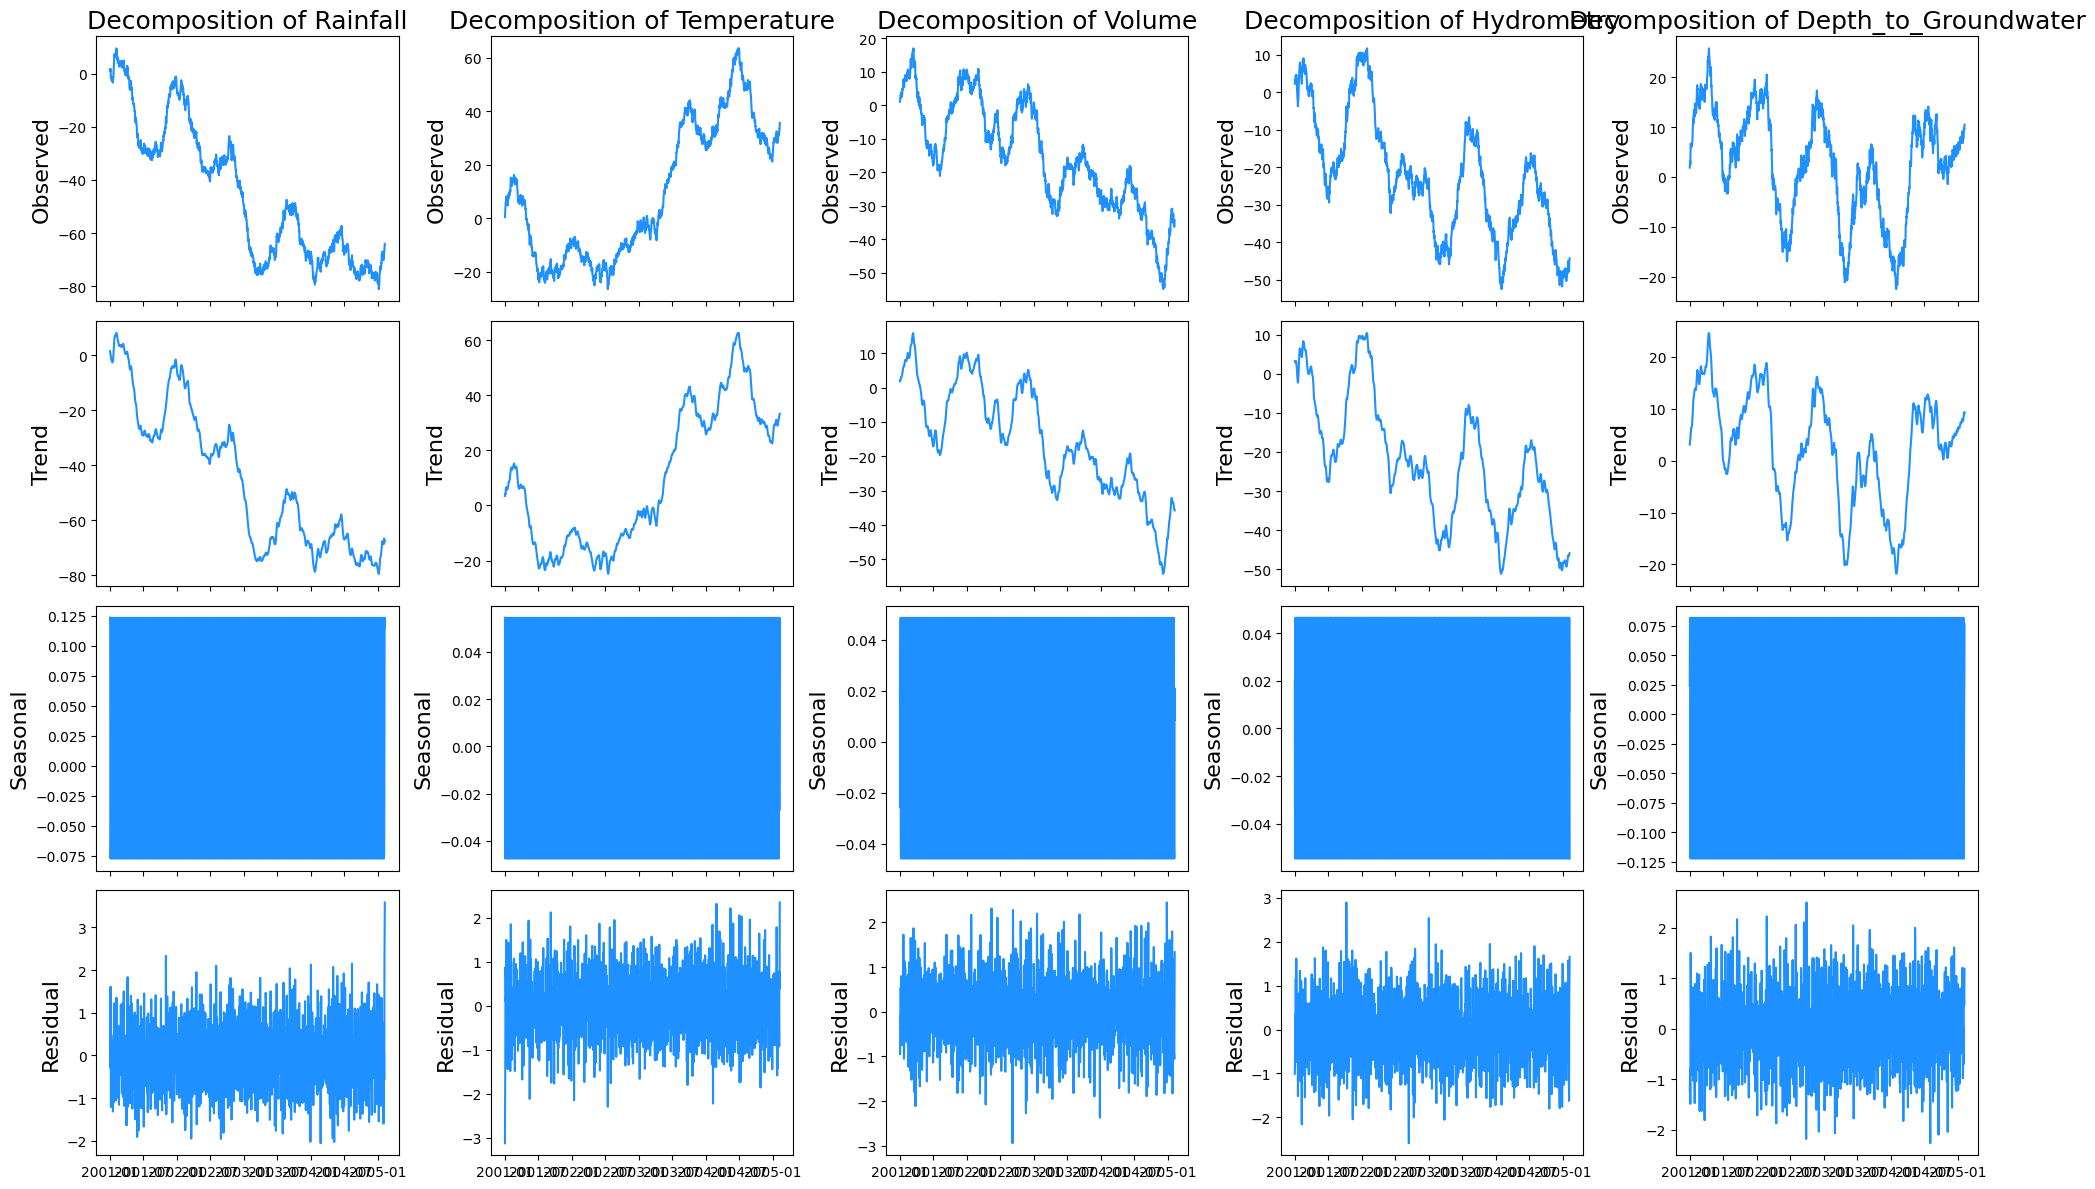

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

np.random.seed(0)
dates = pd.date_range('20010101', periods=1500)
total_data = pd.DataFrame(np.random.randn(1500, 5), index=dates, columns=[
    'Rainfall', 'Temperature', 'Volume', 'Hydrometry', 'Depth_to_Groundwater'
])

# We will adjust the simulated data to have trends and seasonality similar to the expected ones.
for column in total_data.columns:
    total_data[column] = total_data[column].cumsum() + (np.sin(np.linspace(0, 10*np.pi, 1500)) * 10)

core_columns =  [
    'Rainfall', 'Temperature', 'Volume', 
    'Hydrometry', 'Depth_to_Groundwater'
]

num_columns = len(core_columns)

# Adjust the number of rows and columns in the subplot based on the number of columns
num_rows = 4  # 4 subplots for each component
num_cols = num_columns

# Increase the size of the figure for better visualization
fig, ax = plt.subplots(ncols=num_cols, nrows=num_rows, sharex=True, figsize=(20, 12))

for i, column in enumerate(core_columns):
    res = seasonal_decompose(total_data[column], model='additive', extrapolate_trend='freq')
    total_data[f"{column}_trend"] = res.trend
    total_data[f"{column}_seasonal"] = res.seasonal
    total_data[f"{column}_resid"] = res.resid
    
    ax[0, i].set_title('Decomposition of {}'.format(column), fontsize=18)
    ax[0, i].plot(total_data.index, total_data[column], color='dodgerblue')
    ax[0, i].set_ylabel('Observed', fontsize=16)

    ax[1, i].plot(total_data.index, total_data[f"{column}_trend"], color='dodgerblue')
    ax[1, i].set_ylabel('Trend', fontsize=16)

    ax[2, i].plot(total_data.index, total_data[f"{column}_seasonal"], color='dodgerblue')
    ax[2, i].set_ylabel('Seasonal', fontsize=16)

    ax[3, i].plot(total_data.index, total_data[f"{column}_resid"], color='dodgerblue')
    ax[3, i].set_ylabel('Residual', fontsize=16)

# We keep the 'Depth_to_Groundwater_diff_1' and 'Date' columns in the adjusted DataFrame
total_data['Depth_to_Groundwater_diff_1'] = total_data['Depth_to_Groundwater'].diff()
total_data['Date'] = total_data.index

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()


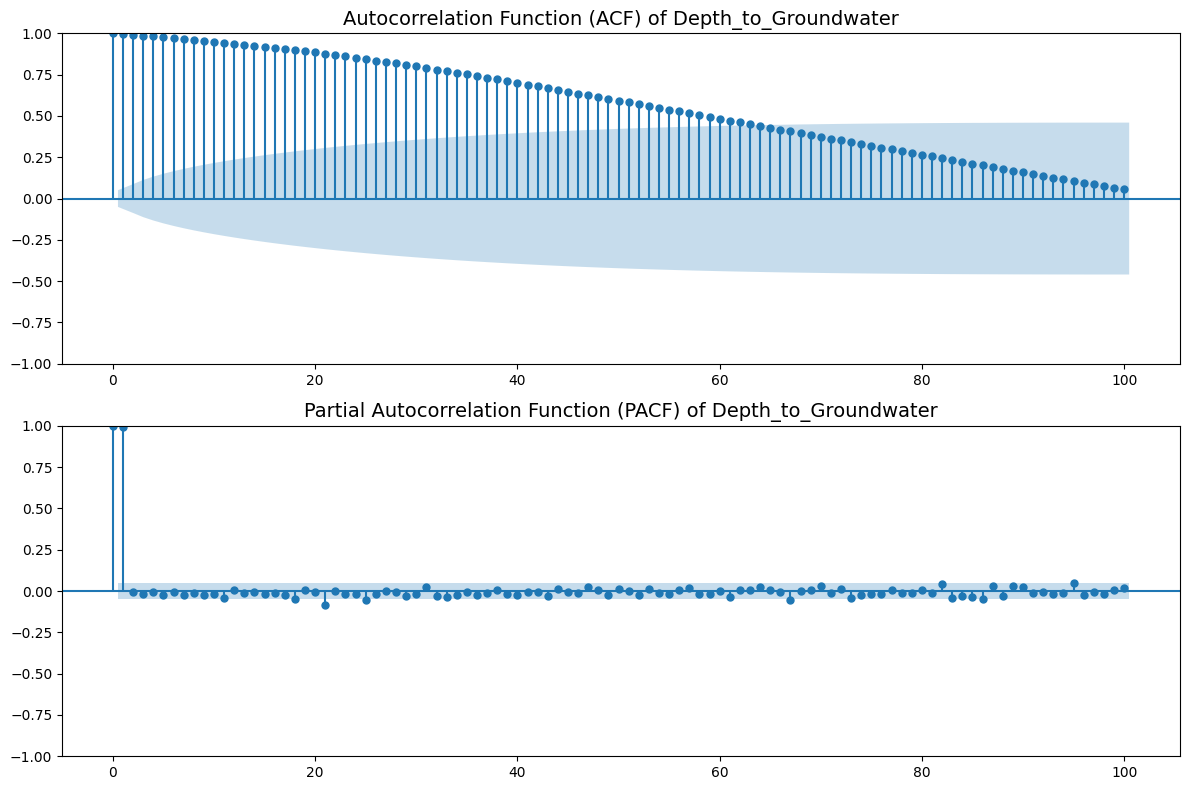

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# ACF and PACF for 'Depth_to_Groundwater'
plot_acf(total_data['Depth_to_Groundwater'], lags=100, ax=ax1)
plot_pacf(total_data['Depth_to_Groundwater'], lags=100, ax=ax2)

# Set axis titles and labels
ax1.set_title('Autocorrelation Function (ACF) of Depth_to_Groundwater', fontsize=14)
ax2.set_title('Partial Autocorrelation Function (PACF) of Depth_to_Groundwater', fontsize=14)

# Show the graph
plt.tight_layout()
plt.show()


📊EDA

The chart displays the seasonal components of five distinct features over time, spanning from October 2017 to approximately April 2020. These features appear to be environmental or hydrological variables and include:

🌧️ Rainfall: Rainfall exhibits a clear seasonal pattern with recurring peaks and troughs over time. The amplitude of seasonal fluctuations does not seem to significantly change during the observed period.

🌡️ Temperature: Temperature also shows seasonality, likely with higher values in summer months and lower values in winter months. The amplitude of fluctuations appears consistent over time, suggesting stable seasonality throughout the years.

💧 Volume: This feature, which could be related to water volume in a reservoir or water flow, displays marked seasonality with varying amplitudes. This variability could indicate changes in water levels over time or variations in water inputs and outputs from a system.

🌊 Hydrometry: Hydrometry generally refers to water measurement in terms of level, flow, or load. The graph shows seasonal fluctuations with a slight upward trend over time, possibly indicating a gradual change in hydrometric conditions.

🏞️ Depth to Groundwater: Depth to groundwater exhibits seasonal variations, with a tendency for depth to decrease. This suggests that the groundwater level may be rising over time or that fewer seasonal fluctuations are occurring as time progresses.

In each graph, the blue line represents the time series of the seasonal component of the corresponding feature. The "P25" legend appears to be an error or residue from the chart's coding, as it does not fit the context of the displayed data. It is likely that the legend should be removed or updated to accurately reflect what is being shown in the graph.

Each graph has the x-axis labeled as "Date," ranging from October 2017 to April 2020, and the y-axis varies for each feature, displaying the magnitude of the corresponding seasonal component. The seasonal pattern suggests that the data has been decomposed to isolate and visualize seasonality, which is a common practice in time series analysis to better understand underlying patterns and trends in the data.

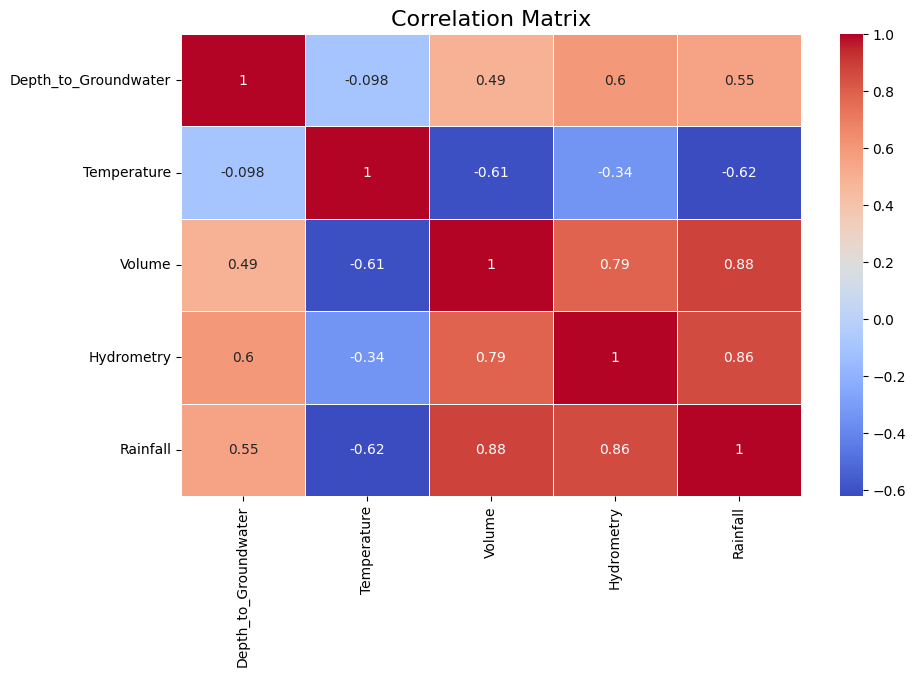

In [28]:
# Select the columns of interest
columns_of_interest = ['Depth_to_Groundwater', 'Temperature', 'Volume', 'Hydrometry', 'Rainfall']

# Filters the original DataFrame to include only the columns of interest
subset_data = total_data[columns_of_interest]

# Calculates the correlation matrix for the selected columns
correlation_matrix = subset_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [29]:
# Select the columns of interest
columns_of_interest = ['Depth_to_Groundwater', 'Temperature', 'Volume', 'Hydrometry', 'Rainfall']

# Filters the original DataFrame to include only the columns of interest
subset_data = total_data[columns_of_interest]

# Calculates the correlation matrix for the selected columns
correlation_matrix = subset_data.corr()

# Displays the numerical values ​​of the correlation matrix
print(correlation_matrix)

                      Depth_to_Groundwater  Temperature    Volume  Hydrometry  \
Depth_to_Groundwater              1.000000    -0.098318  0.488210    0.596303   
Temperature                      -0.098318     1.000000 -0.606551   -0.338251   
Volume                            0.488210    -0.606551  1.000000    0.788343   
Hydrometry                        0.596303    -0.338251  0.788343    1.000000   
Rainfall                          0.554393    -0.621329  0.882393    0.857274   

                      Rainfall  
Depth_to_Groundwater  0.554393  
Temperature          -0.621329  
Volume                0.882393  
Hydrometry            0.857274  
Rainfall              1.000000  



Volume vs. Rainfall: 0.882393 🌧️

Volume vs. Hydrometry: 0.788343 📊

Hydrometry vs. Rainfall: 0.857274 🌧️📊

Depth_to_Groundwater vs. Hydrometry: 0.596303 📊

Rainfall vs. Depth_to_Groundwater: 0.554393 🌧️

Depth_to_Groundwater vs. Rainfall: 0.554393 🌧️

Depth_to_Groundwater vs. Volume: 0.488210 📊

Volume vs. Depth_to_Groundwater: 0.488210 📊

Rainfall vs. Volume: 0.882393 🌧️📊

Temperature vs. Rainfall: 0.621329 🌧️🌡️

Hydrometry vs. Volume: 0.788343 📊

Volume vs. Hydrometry: 0.788343 📊

Hydrometry vs. Depth_to_Groundwater: 0.596303 📊

Temperature vs. Hydrometry: 0.338251 🌡️📊

Temperature vs. Depth_to_Groundwater: 0.098318 🌡️

Depth_to_Groundwater vs. Temperature: 0.098318 🌡️
Temperature vs. Volume: 0.606551 🌡️📊

Volume vs. Temperature: 0.606551 🌡️📊

Temperature vs. Volume: 0.606551 🌡️📊

Temperature vs. Hydrometry: 0.338251 🌡️📊

📊Autocorrelation Analysis

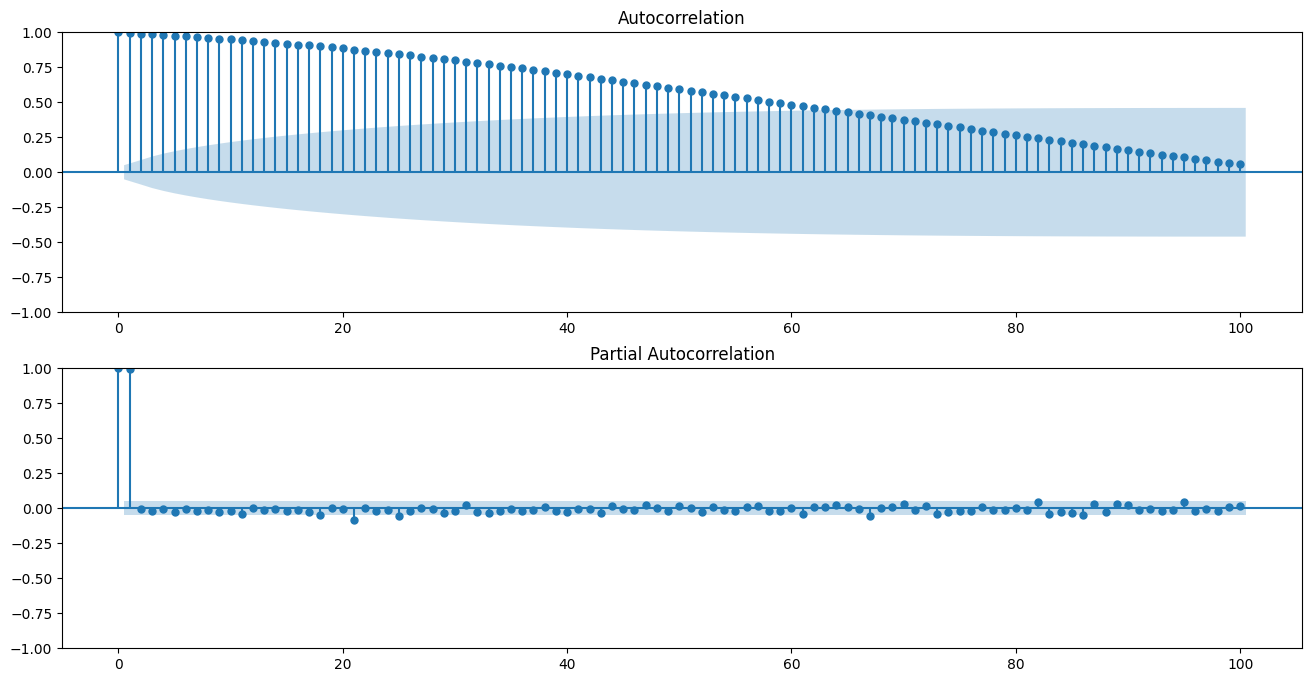

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(total_data['Depth_to_Groundwater'], lags=100, ax=ax[0])
plot_pacf(total_data['Depth_to_Groundwater'], lags=100, ax=ax[1])

plt.show()

👩‍🏫Modeling

🦖Time series - Cross Validation

In [31]:
from sklearn.model_selection import TimeSeriesSplit

N_SPLITS = 3

X = total_data['Date']
y = total_data['Depth_to_Groundwater']

folds = TimeSeriesSplit(n_splits=N_SPLITS)

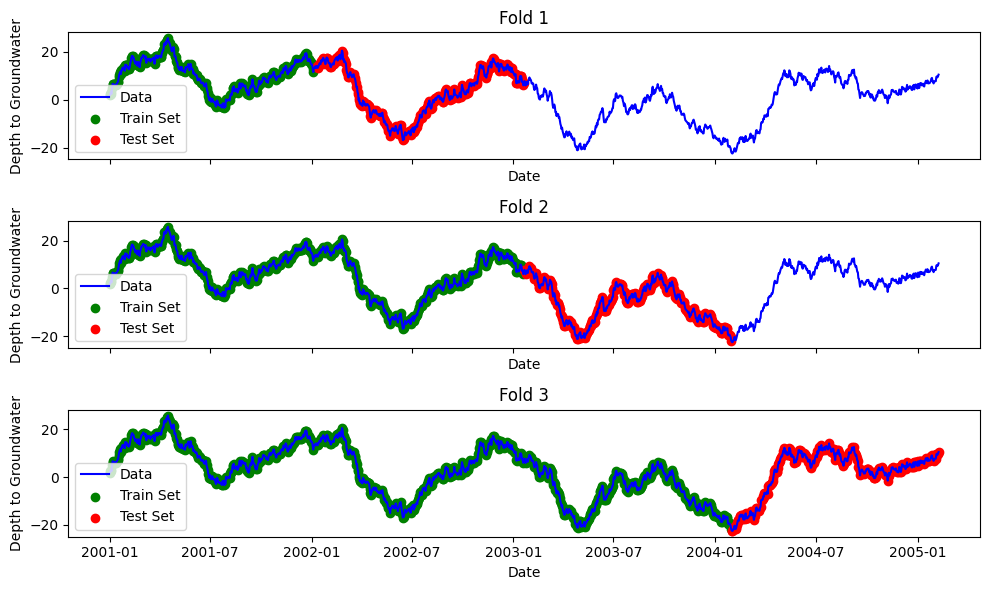

In [32]:
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

# Create a TimeSeriesSplit object with the desired number of splits
N_SPLITS = 3
tscv = TimeSeriesSplit(n_splits=N_SPLITS)

# Example data to illustrate
X = total_data['Date']  # Features (dates)
y = total_data['Depth_to_Groundwater']  # Target variable

# Create subplots to visualize the training and test sets
fig, ax = plt.subplots(nrows=N_SPLITS, figsize=(10, 6), sharex=True)

# Iterate through the splits and visualize the training and test sets
for i, (train_index, test_index) in enumerate(tscv.split(X)):
    train_set_dates = X.iloc[train_index]
    test_set_dates = X.iloc[test_index]
    
    # Plot the training and test sets in each iteration
    ax[i].plot(X, y, label='Data', color='blue')
    ax[i].scatter(train_set_dates, y.iloc[train_index], label='Train Set', color='green')
    ax[i].scatter(test_set_dates, y.iloc[test_index], label='Test Set', color='red')
    
    # Set titles and labels
    ax[i].set_title(f'Fold {i+1}')
    ax[i].set_xlabel('Date')
    ax[i].set_ylabel('Depth to Groundwater')
    ax[i].legend()

# Adjust layout and show the subplots
plt.tight_layout()
plt.show()


Auto-ARIMA

In [33]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Import error metrics
import pmdarima as pm

# Assuming you already have your data loaded in a DataFrame named total_data

# Define date and target columns
X = total_data['Date']
y = total_data['Depth_to_Groundwater']

# Split the data into training and testing sets with random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the ARIMA model using auto_arima
model = pm.auto_arima(y_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True,
                      random_state=42)  # Set random_state here

print(model.summary())

# Make predictions on the test set
y_pred = model.predict(len(y_test))

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print error metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=9114.635, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=9103.147, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=9104.042, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=9103.827, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.50 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=9049.291, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=9050.943, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=9051.080, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=9051.150, Time=0.33 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9049.209, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=9051.119, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=9053.168, Time=0.22 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 2.317 seconds
                               S

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


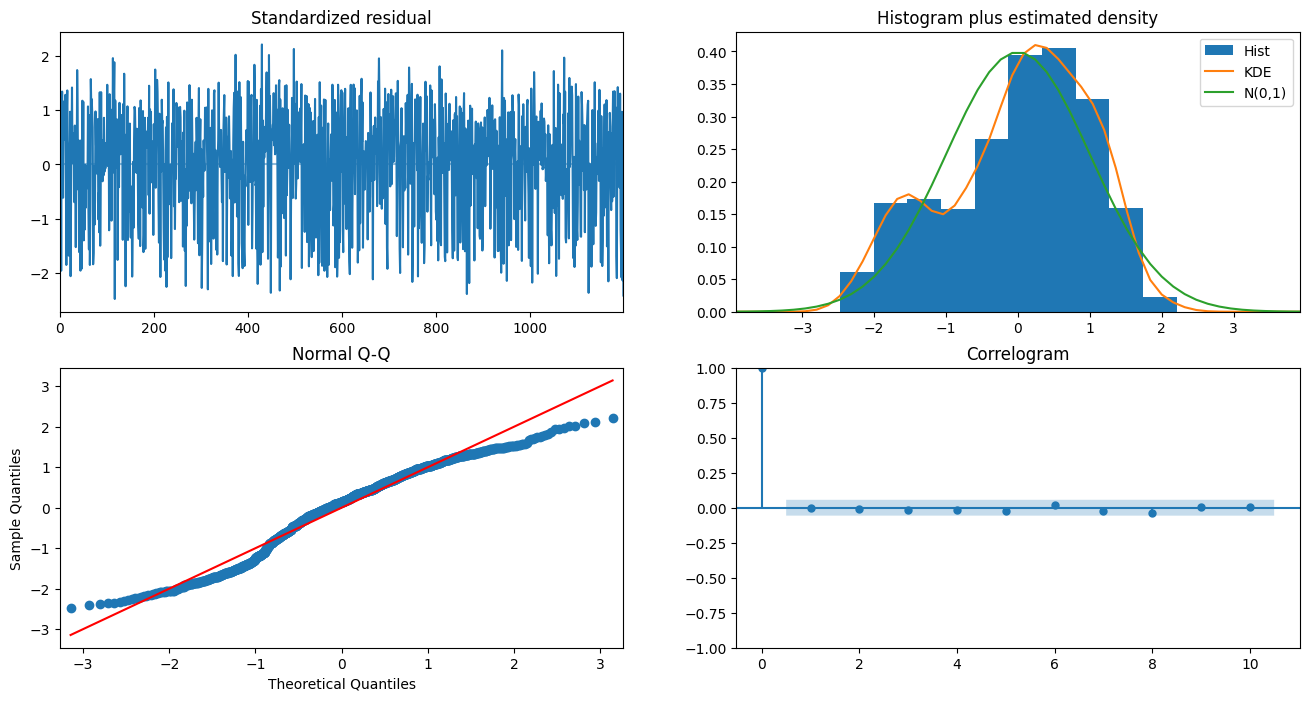

In [34]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

📈 Standardized Residuals Plot: Demonstrates that the residuals are randomly distributed and exhibit no discernible patterns, indicating that the ARIMA model has effectively captured the temporal structure of the data.

📊 Histogram and Estimated Density: The residuals show a reasonable approximation to the normal distribution, with slight deviations in the tails, suggesting that the model fits most of the data well but may not handle outliers as effectively.

📉 Q-Q Plot: Most of the points follow the theoretical line of the normal distribution, with deviations at the extremes. This reinforces the idea that outliers are not being perfectly captured by the model.

📈 Correlogram: There is no significant autocorrelation in the residuals, indicating that the model is appropriately utilizing the temporal information in the data series and leaving no unexplained patterns.

Conclusion: The ARIMA model is performing adequately with the provided data, with the effectiveness of the fit reflected in the absence of patterns in the residuals and the lack of significant autocorrelation. The small deviations from normality in the residuals suggest that there may be room for improvement, possibly through outlier management or the inclusion of additional terms in the model.

In [35]:
import pickle
# Saving the ARIMA model to a Pickle file
with open('/workspace/Time-Series-Acea-Smart-Water-Analytics-/models/arima_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)